<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Python Libraries

Python works with libraries, which are collections of pre-written code that provide useful functions and tools for various tasks. 

This notebooks contains a quickstart to two fundamental Python libraries for data analysis: NumPy (`numpy`) and Pandas (`pandas`).

<img src="../Images/pandas_numpy.png" style="width: 300px;">

Data analysis with `pandas` works with tabular data using **DataFrames** (similar to Excel spreadsheets or database tables). Dataframes have a 2-dimensional data structure and labeled axes (rows and columns). These are indexed for effiecient data retrieval.

<img src="../Images/dataframe.png" style="width: 300px;">

`numpy` is the foundational library for numerical computing, supporting large and multi-dimensional **arrays** and vectorized operations. A data array is a structure for stroring elements of the same type. Arrays can be one-dimensional or multi-dimensional (like a matrix).

<img src="../Images/array.png" style="width: 600px;">

## 1. Predefined functions

Python packages have predefined functions for mathematical operations; Examples below:

In [1]:
import numpy as np
import statistics as stat
import math

In [2]:
x = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]

In [3]:
stat.mean(x)

1.6071428571428572

In [4]:
np.mean(x)

1.6071428571428572

In [5]:
stat.median(x)

1.25

In [6]:
stat.variance(x)

1.3720238095238095

In [7]:
math.sqrt(3)

1.7320508075688772

## 2. NumPy & Pandas - Temperature time series
<img src="../Images/temperature.jpg" style="width: 1000px;">

*Image modified from Gerd Altmann, Pixabay*

**Original dataset:** NOAA National Centers for Environmental information: Climate at a Glance: Global Time Series [Data set](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series), retrieved on August 23, 2024.

## 2.1 NumPy

In [8]:
import numpy as np 

Import data as a 2D numpy array:

In [9]:
path = '../Datasets/NOAA_time_series.csv' # Relative path to dataset file
time_series = np.loadtxt('../Datasets/NOAA_time_series.csv', skiprows=5, delimiter=',')
print(time_series)

[[ 1.850e+03 -3.000e-02]
 [ 1.851e+03  7.000e-02]
 [ 1.852e+03  8.000e-02]
 [ 1.853e+03  1.300e-01]
 [ 1.854e+03  0.000e+00]
 [ 1.855e+03 -1.200e-01]
 [ 1.856e+03 -1.400e-01]
 [ 1.857e+03 -1.600e-01]
 [ 1.858e+03 -1.400e-01]
 [ 1.859e+03 -1.300e-01]
 [ 1.860e+03 -2.100e-01]
 [ 1.861e+03 -1.500e-01]
 [ 1.862e+03 -2.700e-01]
 [ 1.863e+03 -2.300e-01]
 [ 1.864e+03 -9.000e-02]
 [ 1.865e+03  1.000e-02]
 [ 1.866e+03  0.000e+00]
 [ 1.867e+03 -1.800e-01]
 [ 1.868e+03 -8.000e-02]
 [ 1.869e+03 -9.000e-02]
 [ 1.870e+03 -2.000e-02]
 [ 1.871e+03 -2.000e-02]
 [ 1.872e+03 -1.000e-01]
 [ 1.873e+03 -8.000e-02]
 [ 1.874e+03 -2.300e-01]
 [ 1.875e+03 -9.000e-02]
 [ 1.876e+03 -1.700e-01]
 [ 1.877e+03  2.900e-01]
 [ 1.878e+03  2.200e-01]
 [ 1.879e+03 -1.000e-02]
 [ 1.880e+03 -2.100e-01]
 [ 1.881e+03  0.000e+00]
 [ 1.882e+03 -2.100e-01]
 [ 1.883e+03 -8.000e-02]
 [ 1.884e+03 -3.300e-01]
 [ 1.885e+03 -2.600e-01]
 [ 1.886e+03 -1.800e-01]
 [ 1.887e+03 -2.600e-01]
 [ 1.888e+03 -1.000e-02]
 [ 1.889e+03 -7.000e-02]


Data selection: Selecting the last 30 years of data from the time series corresponds to selecting the last 30 elements of the time series.

In [10]:
time_series[-30:, :]

array([[1.995e+03, 4.900e-01],
       [1.996e+03, 3.700e-01],
       [1.997e+03, 4.200e-01],
       [1.998e+03, 7.000e-01],
       [1.999e+03, 3.800e-01],
       [2.000e+03, 4.000e-01],
       [2.001e+03, 6.200e-01],
       [2.002e+03, 6.400e-01],
       [2.003e+03, 5.700e-01],
       [2.004e+03, 3.600e-01],
       [2.005e+03, 6.400e-01],
       [2.006e+03, 5.600e-01],
       [2.007e+03, 5.900e-01],
       [2.008e+03, 5.900e-01],
       [2.009e+03, 7.400e-01],
       [2.010e+03, 6.700e-01],
       [2.011e+03, 7.000e-01],
       [2.012e+03, 6.300e-01],
       [2.013e+03, 6.200e-01],
       [2.014e+03, 6.500e-01],
       [2.015e+03, 7.900e-01],
       [2.016e+03, 8.700e-01],
       [2.017e+03, 8.500e-01],
       [2.018e+03, 8.400e-01],
       [2.019e+03, 9.200e-01],
       [2.020e+03, 9.100e-01],
       [2.021e+03, 9.000e-01],
       [2.022e+03, 9.000e-01],
       [2.023e+03, 1.180e+00],
       [2.024e+03, 1.210e+00]])

However, selecting elements from an array based on the values in a specific column is also possible using boolean indexing:

In [11]:
mask = time_series[:, 0] > 1995
print(mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [12]:
filtered_data = time_series[mask]
print(filtered_data)

[[1.996e+03 3.700e-01]
 [1.997e+03 4.200e-01]
 [1.998e+03 7.000e-01]
 [1.999e+03 3.800e-01]
 [2.000e+03 4.000e-01]
 [2.001e+03 6.200e-01]
 [2.002e+03 6.400e-01]
 [2.003e+03 5.700e-01]
 [2.004e+03 3.600e-01]
 [2.005e+03 6.400e-01]
 [2.006e+03 5.600e-01]
 [2.007e+03 5.900e-01]
 [2.008e+03 5.900e-01]
 [2.009e+03 7.400e-01]
 [2.010e+03 6.700e-01]
 [2.011e+03 7.000e-01]
 [2.012e+03 6.300e-01]
 [2.013e+03 6.200e-01]
 [2.014e+03 6.500e-01]
 [2.015e+03 7.900e-01]
 [2.016e+03 8.700e-01]
 [2.017e+03 8.500e-01]
 [2.018e+03 8.400e-01]
 [2.019e+03 9.200e-01]
 [2.020e+03 9.100e-01]
 [2.021e+03 9.000e-01]
 [2.022e+03 9.000e-01]
 [2.023e+03 1.180e+00]
 [2.024e+03 1.210e+00]]


Mathematical operations:

In [13]:
print(np.mean(time_series[:,1]))

0.07319999999999999


**Exercise:** Convert temperature unit °C to Kelvin in the array. 

In [14]:
time_series[:,2] = time_series[:,1] + 273.15
#print(time_series[:,1])

IndexError: index 2 is out of bounds for axis 1 with size 2

Plot:

In [15]:
import matplotlib.pyplot as plt

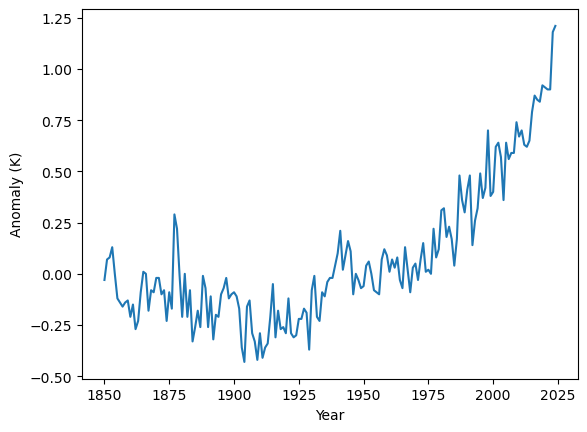

In [16]:
plt.figure()
plt.plot(time_series[:, 0], time_series[:, 1])  # Plot Year vs. Anomaly
plt.xlabel('Year')
plt.ylabel('Anomaly (K)')
plt.show()

## 2.2 Pandas

In [17]:
import pandas as pd

(Re)Import data in a dataframe:

In [18]:
path = '../Datasets/NOAA_time_series.csv' # Relative path to dataset file
time_series = pd.read_csv(path, skiprows=4, delimiter=',')

Investigate DataFrame structure:

In [21]:
print(time_series.tail(10))

     Year  Anomaly
165  2015     0.79
166  2016     0.87
167  2017     0.85
168  2018     0.84
169  2019     0.92
170  2020     0.91
171  2021     0.90
172  2022     0.90
173  2023     1.18
174  2024     1.21


In [22]:
print(time_series.index)

RangeIndex(start=0, stop=175, step=1)


In [23]:
print(time_series.columns)

Index(['Year', 'Anomaly'], dtype='object')


In [24]:
print(time_series.dtypes)

Year         int64
Anomaly    float64
dtype: object


Data selection:

In [25]:
print(time_series.loc[0:4,:])

   Year  Anomaly
0  1850    -0.03
1  1851     0.07
2  1852     0.08
3  1853     0.13
4  1854     0.00


In [28]:
time_series_selection = time_series.loc[time_series['Year'] >= 1994,:]
print(time_series_selection)

     Year  Anomaly
144  1994     0.32
145  1995     0.49
146  1996     0.37
147  1997     0.42
148  1998     0.70
149  1999     0.38
150  2000     0.40
151  2001     0.62
152  2002     0.64
153  2003     0.57
154  2004     0.36
155  2005     0.64
156  2006     0.56
157  2007     0.59
158  2008     0.59
159  2009     0.74
160  2010     0.67
161  2011     0.70
162  2012     0.63
163  2013     0.62
164  2014     0.65
165  2015     0.79
166  2016     0.87
167  2017     0.85
168  2018     0.84
169  2019     0.92
170  2020     0.91
171  2021     0.90
172  2022     0.90
173  2023     1.18
174  2024     1.21


Reset index:

In [29]:
time_series_selection.reset_index(drop=True, inplace=True)
print(time_series_selection)

    Year  Anomaly
0   1994     0.32
1   1995     0.49
2   1996     0.37
3   1997     0.42
4   1998     0.70
5   1999     0.38
6   2000     0.40
7   2001     0.62
8   2002     0.64
9   2003     0.57
10  2004     0.36
11  2005     0.64
12  2006     0.56
13  2007     0.59
14  2008     0.59
15  2009     0.74
16  2010     0.67
17  2011     0.70
18  2012     0.63
19  2013     0.62
20  2014     0.65
21  2015     0.79
22  2016     0.87
23  2017     0.85
24  2018     0.84
25  2019     0.92
26  2020     0.91
27  2021     0.90
28  2022     0.90
29  2023     1.18
30  2024     1.21


Mathematical operations:

In [30]:
print(time_series.describe())

              Year     Anomaly
count   175.000000  175.000000
mean   1937.000000    0.073200
std      50.662281    0.339958
min    1850.000000   -0.430000
25%    1893.500000   -0.155000
50%    1937.000000   -0.020000
75%    1980.500000    0.195000
max    2024.000000    1.210000


In [31]:
# convert temperature unit °C to Kelvin
time_series['Anomaly'] = time_series['Anomaly'] + 273.15 
print(time_series.head())

   Year  Anomaly
0  1850   273.12
1  1851   273.22
2  1852   273.23
3  1853   273.28
4  1854   273.15


Plot:

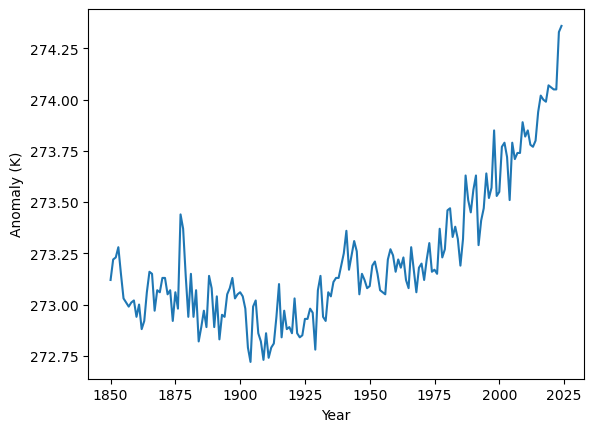

In [32]:
plt.figure()
plt.plot(time_series['Year'], time_series['Anomaly'])  # Plot Year vs. Anomaly
plt.xlabel('Year')
plt.ylabel('Anomaly (K)')
plt.show()

## 3. Pandas - Iris dataset
<img src="../Images/iris.png" style="width: 1000px;">

*Image modified from Steve Dorand, Pixabay*

**Original dataset:** https://www.kaggle.com/datasets/uciml/iris/data

In [33]:
import pandas as pd

Import data in dataframe:

In [34]:
path = '../Datasets/Iris.csv' # relative path to dataset file
iris = pd.read_csv(path)

Investigate dataframe structure and data:

In [35]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [36]:
print(iris.index)

RangeIndex(start=0, stop=150, step=1)


In [37]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [38]:
print(iris.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [39]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Data selection:

In [40]:
print(iris.loc[0:4,:])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [41]:
print(iris.loc[iris['Species'] == 'Iris-versicolor'])

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50   51            7.0           3.2            4.7           1.4   
51   52            6.4           3.2            4.5           1.5   
52   53            6.9           3.1            4.9           1.5   
53   54            5.5           2.3            4.0           1.3   
54   55            6.5           2.8            4.6           1.5   
55   56            5.7           2.8            4.5           1.3   
56   57            6.3           3.3            4.7           1.6   
57   58            4.9           2.4            3.3           1.0   
58   59            6.6           2.9            4.6           1.3   
59   60            5.2           2.7            3.9           1.4   
60   61            5.0           2.0            3.5           1.0   
61   62            5.9           3.0            4.2           1.5   
62   63            6.0           2.2            4.0           1.0   
63   64            6.1           2

Dataframe to array:

In [42]:
array = iris.values
print(array)

[[1 5.1 3.5 1.4 0.2 'Iris-setosa']
 [2 4.9 3.0 1.4 0.2 'Iris-setosa']
 [3 4.7 3.2 1.3 0.2 'Iris-setosa']
 [4 4.6 3.1 1.5 0.2 'Iris-setosa']
 [5 5.0 3.6 1.4 0.2 'Iris-setosa']
 [6 5.4 3.9 1.7 0.4 'Iris-setosa']
 [7 4.6 3.4 1.4 0.3 'Iris-setosa']
 [8 5.0 3.4 1.5 0.2 'Iris-setosa']
 [9 4.4 2.9 1.4 0.2 'Iris-setosa']
 [10 4.9 3.1 1.5 0.1 'Iris-setosa']
 [11 5.4 3.7 1.5 0.2 'Iris-setosa']
 [12 4.8 3.4 1.6 0.2 'Iris-setosa']
 [13 4.8 3.0 1.4 0.1 'Iris-setosa']
 [14 4.3 3.0 1.1 0.1 'Iris-setosa']
 [15 5.8 4.0 1.2 0.2 'Iris-setosa']
 [16 5.7 4.4 1.5 0.4 'Iris-setosa']
 [17 5.4 3.9 1.3 0.4 'Iris-setosa']
 [18 5.1 3.5 1.4 0.3 'Iris-setosa']
 [19 5.7 3.8 1.7 0.3 'Iris-setosa']
 [20 5.1 3.8 1.5 0.3 'Iris-setosa']
 [21 5.4 3.4 1.7 0.2 'Iris-setosa']
 [22 5.1 3.7 1.5 0.4 'Iris-setosa']
 [23 4.6 3.6 1.0 0.2 'Iris-setosa']
 [24 5.1 3.3 1.7 0.5 'Iris-setosa']
 [25 4.8 3.4 1.9 0.2 'Iris-setosa']
 [26 5.0 3.0 1.6 0.2 'Iris-setosa']
 [27 5.0 3.4 1.6 0.4 'Iris-setosa']
 [28 5.2 3.5 1.5 0.2 'Iris-setosa']
 

Sort & reset index:

In [43]:
sorted_iris = iris.sort_values(by='PetalLengthCm', ascending=False)
print(sorted_iris.head(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
118  119            7.7           2.6            6.9           2.3   
122  123            7.7           2.8            6.7           2.0   
117  118            7.7           3.8            6.7           2.2   
105  106            7.6           3.0            6.6           2.1   
131  132            7.9           3.8            6.4           2.0   

            Species  
118  Iris-virginica  
122  Iris-virginica  
117  Iris-virginica  
105  Iris-virginica  
131  Iris-virginica  


In [44]:
sorted_iris.reset_index(drop=True, inplace=True)
print(sorted_iris.head(5))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  119            7.7           2.6            6.9           2.3   
1  123            7.7           2.8            6.7           2.0   
2  118            7.7           3.8            6.7           2.2   
3  106            7.6           3.0            6.6           2.1   
4  132            7.9           3.8            6.4           2.0   

          Species  
0  Iris-virginica  
1  Iris-virginica  
2  Iris-virginica  
3  Iris-virginica  
4  Iris-virginica  


Histogram plot showing the value distribution of petal length:

<Axes: ylabel='Frequency'>

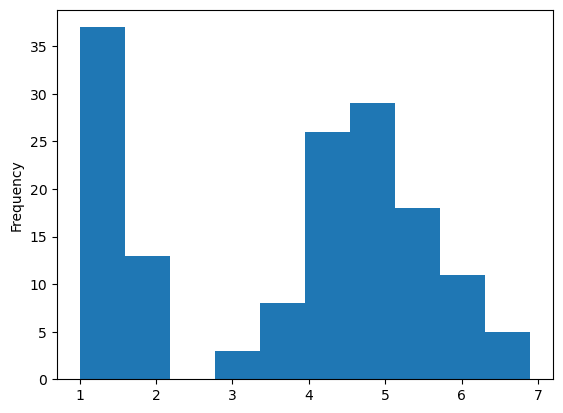

In [45]:
iris['PetalLengthCm'].plot.hist()

**Exercise:** Calculate the area of the Petals via multiplication (no need for precise ellipse area) in a new column and print the first rows of the dataframe afterwards.

In [46]:
iris['PetalAreaCm2'] = iris['PetalLengthCm'] * iris['PetalWidthCm'] 
print(iris.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   PetalAreaCm2  
0          0.28  
1          0.28  
2          0.26  
3          0.30  
4          0.28  
